In [25]:
import glob
import numpy as np

from einops import rearrange
from matplotlib.pyplot import imshow
from PIL import Image
from imgbeddings import imgbeddings
from deepface import DeepFace

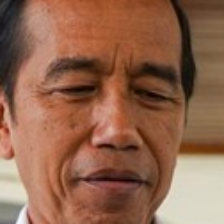

In [47]:
imgs = [f"../data/img{i}.jpg" for i in range(1, 11)]

img_0 = Image.fromarray((DeepFace.extract_faces(imgs[0])[0]["face"] * 255).astype(np.uint8))
img_1 = Image.fromarray((DeepFace.extract_faces(imgs[1])[0]["face"] * 255).astype(np.uint8))
img_2 = Image.fromarray((DeepFace.extract_faces(imgs[4])[0]["face"] * 255).astype(np.uint8))

img_0

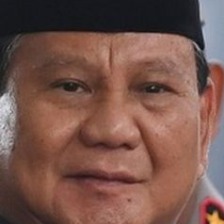

In [48]:
img_1

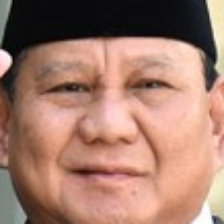

In [43]:
img_2

In [56]:
def cos_sim(a, b):
    return np.dot(a, b.T) / (np.linalg.norm(a) * np.linalg.norm(b.T))

ibed = imgbeddings(patch_size=16)

embed_0 = ibed.to_embeddings(img_0)
embed_1 = ibed.to_embeddings(img_1)
embed_2 = ibed.to_embeddings(img_2)

cos_sim(embed_0, embed_1), cos_sim(embed_1, embed_2)

(array([[0.8779816]], dtype=float32), array([[0.96799195]], dtype=float32))